In [17]:
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Sequential

In [2]:
import tensorflow as tf
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


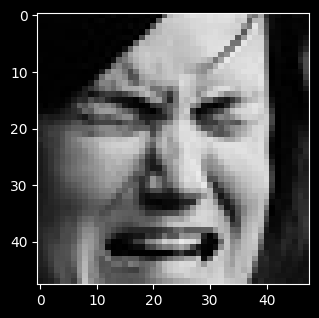

In [18]:
#Displaying Images

picture_size = 48
folder_path = "datasets/face_expressions/"
expression = 'disgust'

plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,1)
    img = load_img(folder_path+"train/"+expression+"/" +
                   os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show()



In [19]:
#Making Training and Validation Data

batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [21]:
#Model Building
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_12 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 128)      

c:\Users\georg\miniconda3\envs\tf_gpu_env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
#Fitting the Model with Training and Validation Data

from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


C:\Users\georg\AppData\Local\Temp\ipykernel_1832\715841556.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


225/225 [==============================] - 20s 77ms/step - loss: 1.7800 - accuracy: 0.3176 - val_loss: 1.6439 - val_accuracy: 0.3571 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 18s 78ms/step - loss: 1.4369 - accuracy: 0.4486 - val_loss: 1.5154 - val_accuracy: 0.4202 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 17s 77ms/step - loss: 1.2870 - accuracy: 0.5081 - val_loss: 1.3037 - val_accuracy: 0.5038 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 17s 77ms/step - loss: 1.1935 - accuracy: 0.5479 - val_loss: 1.2553 - val_accuracy: 0.5179 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 18s 81ms/step - loss: 1.1330 - accuracy: 0.5695 - val_loss: 1.1938 - val_accuracy: 0.5479 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 20s 87ms/step - loss: 1.0734 - accuracy: 0.5940 - val_loss: 1.2372 - val_accuracy: 0.5250 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 150s 671ms/step

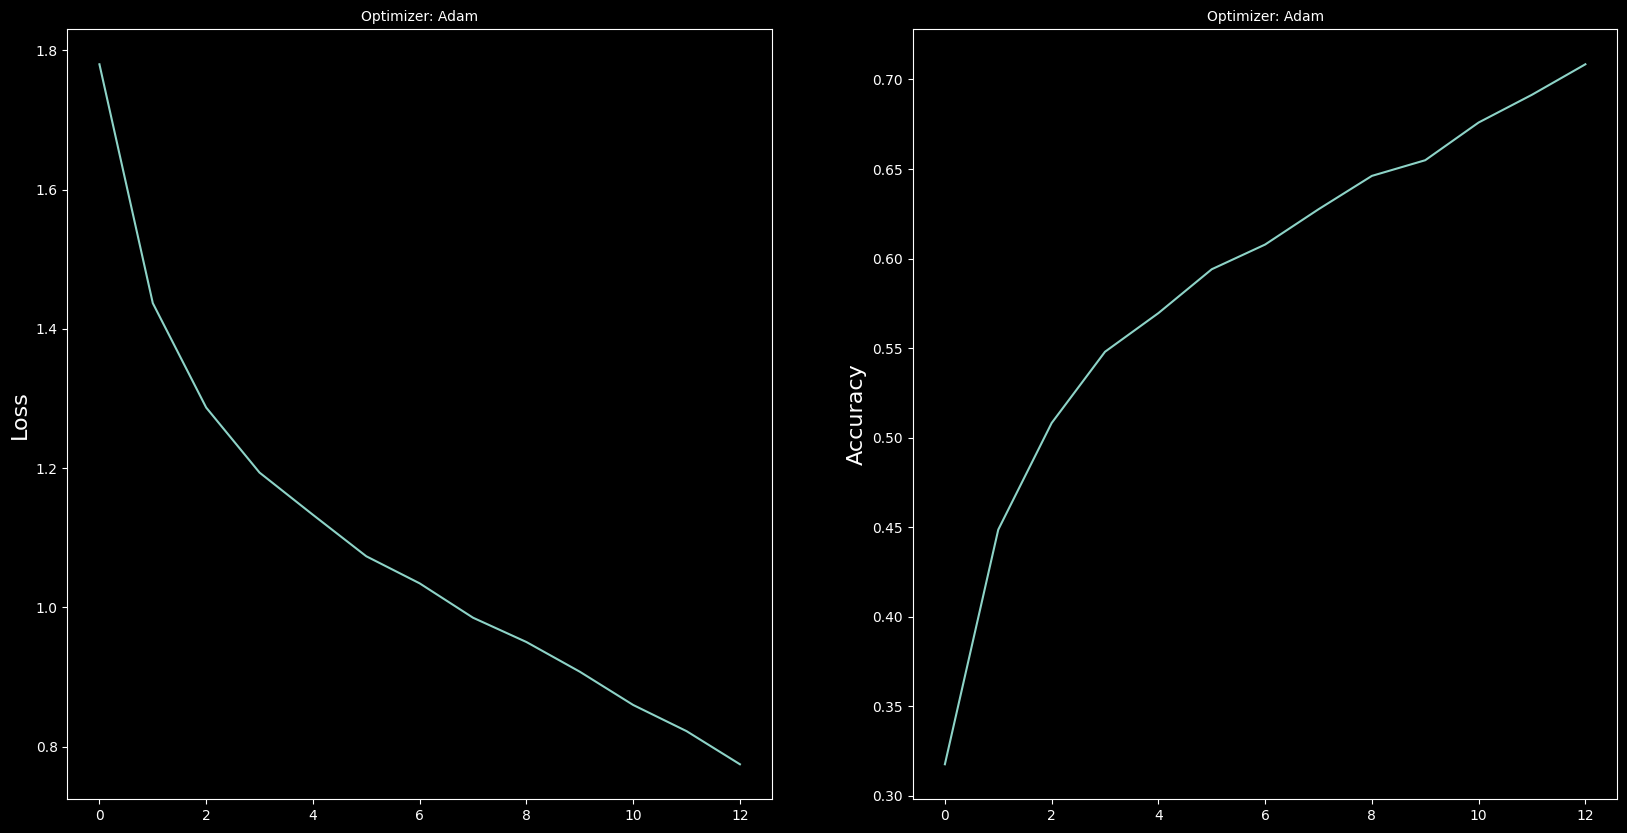

In [23]:
#plotting Accuracy & loss
plt.style.use('dark_background')

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
plt.title('Optimizer: Adam', fontsize=10)  # Correct method name
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')

plt.subplot(1, 2, 2)
plt.title('Optimizer: Adam', fontsize=10)  # Correct method name
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')

plt.show()




In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Test set generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Ensure same preprocessing as during training
test_set = test_datagen.flow_from_directory(
    'datasets/face_expressions/validation',
    target_size=(picture_size, picture_size),  # Use same target_size as training
    batch_size=32,
    class_mode='categorical',  # If you're using categorical labels
    shuffle=False
)


Found 7066 images belonging to 7 classes.


In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.models import load_model

# List of categories corresponding to the indices in the output
categories = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

# Define the image size you want to use (based on your model's expected input)
picture_size = 48  # This should be the same size used during training

# Load the model
model = load_model("models/model.h5")  # Replace with the correct model path

# Load the image as grayscale and resize to match input size
img_path = 'datasets/face_expressions/validation/fear/21.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(picture_size, picture_size), color_mode='grayscale')

# Convert the image to array and normalize it
img_array = image.img_to_array(img) / 255.0  # Rescale image like during training
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make a prediction
prediction = model.predict(img_array)

# Print the probability for each class
for i, category in enumerate(categories):
    print(f"Class: {category}, Probability: {prediction[0][i]:.4f}")


1/1 [==============================] - 0s 335ms/step
Class: angry, Probability: 0.3198
Class: disgust, Probability: 0.0415
Class: fear, Probability: 0.3366
Class: happy, Probability: 0.0861
Class: neutral, Probability: 0.0212
Class: sad, Probability: 0.0664
Class: surprise, Probability: 0.1283
